In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## read in csv file
df = pd.read_csv("water_potability.csv")


In [4]:
## check if there is missing value
missing = df.isnull().sum()
print(missing)


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [10]:
# Use median value of each column to replace the missing value
#for column in df.columns:
#    df[column].fillna(df[column].median(), inplace=True)


In [5]:
#Drop the null values
df.dropna(inplace=True)



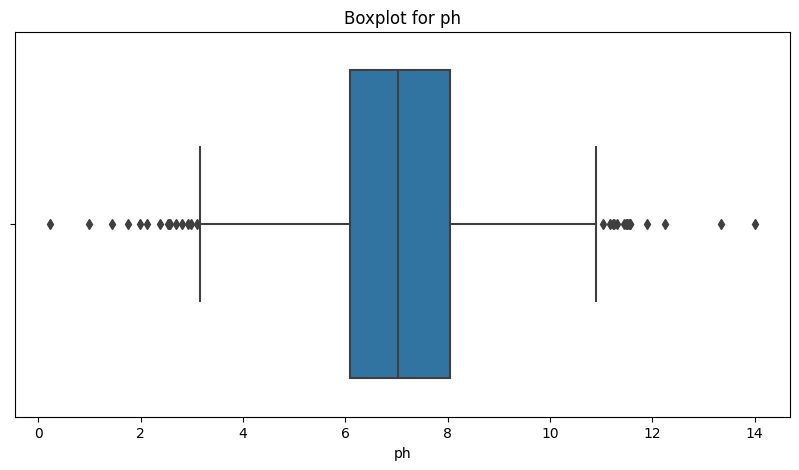

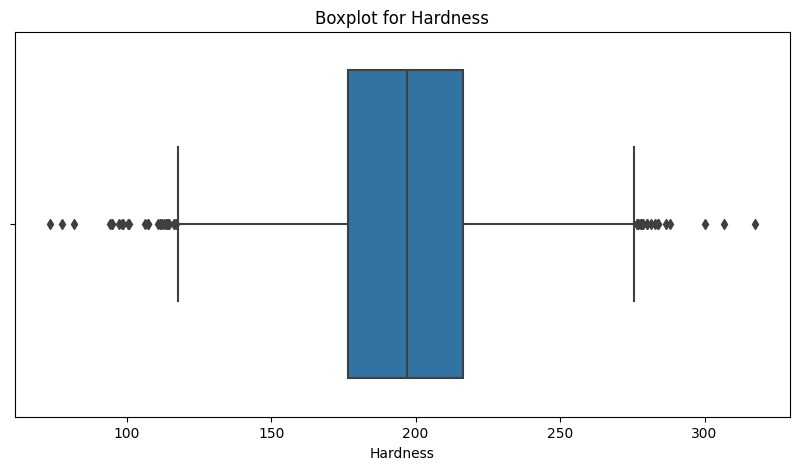

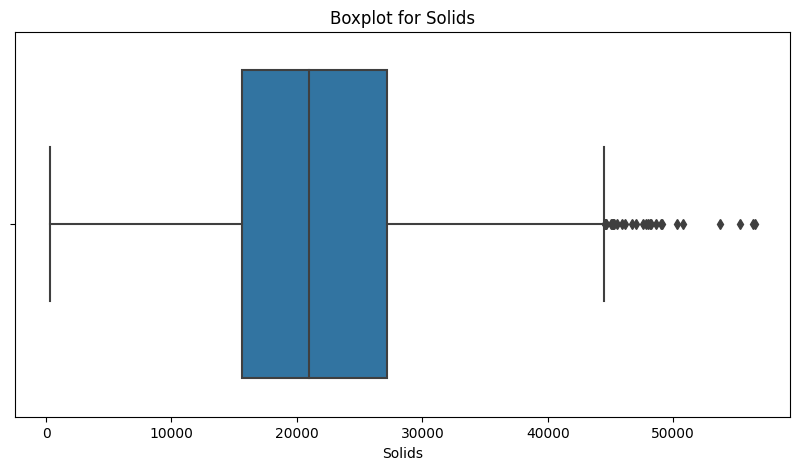

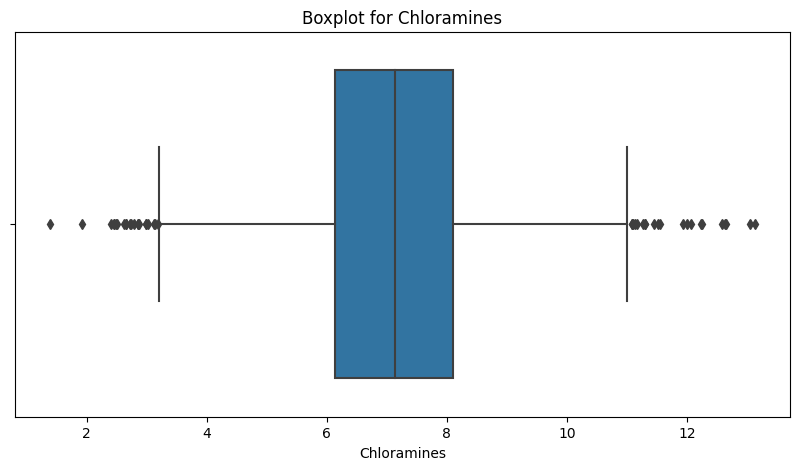

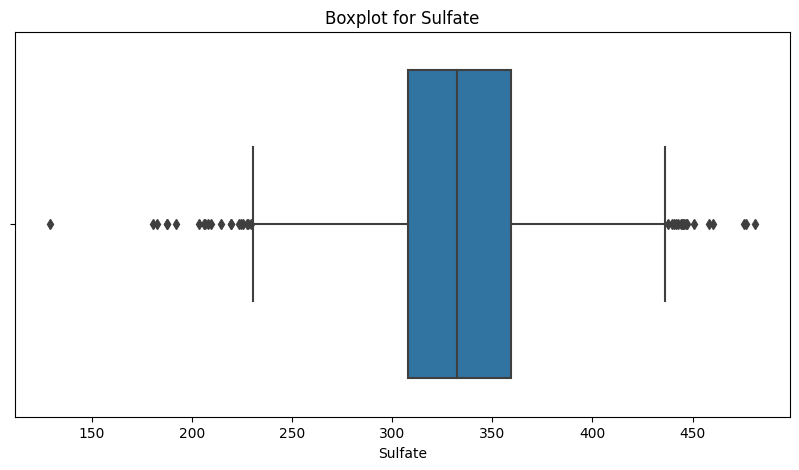

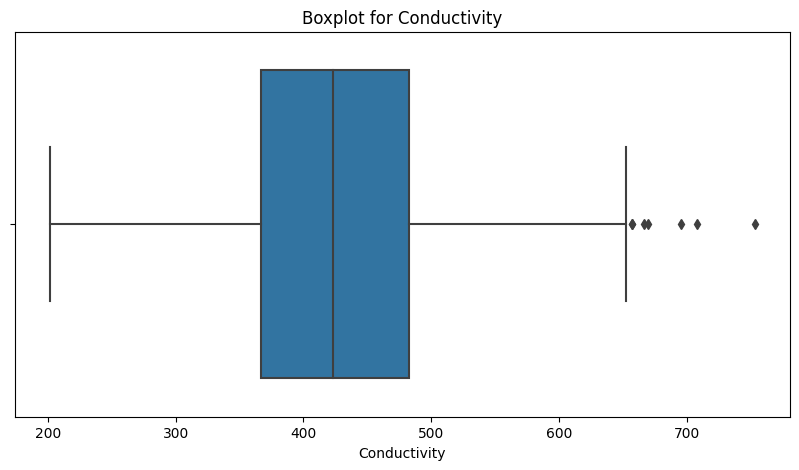

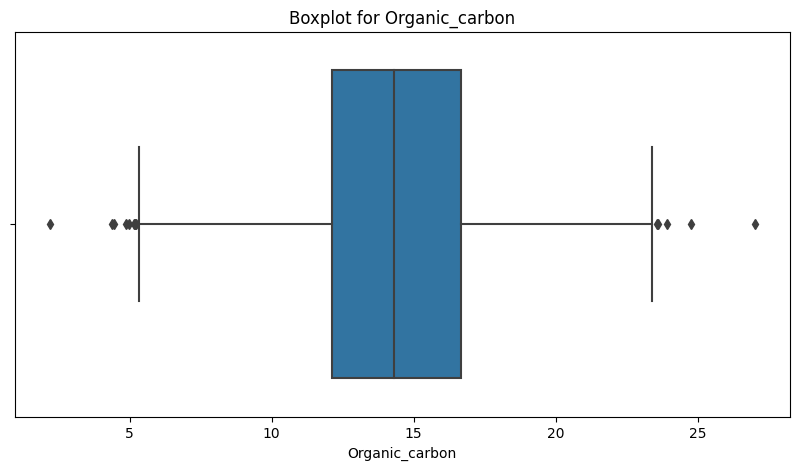

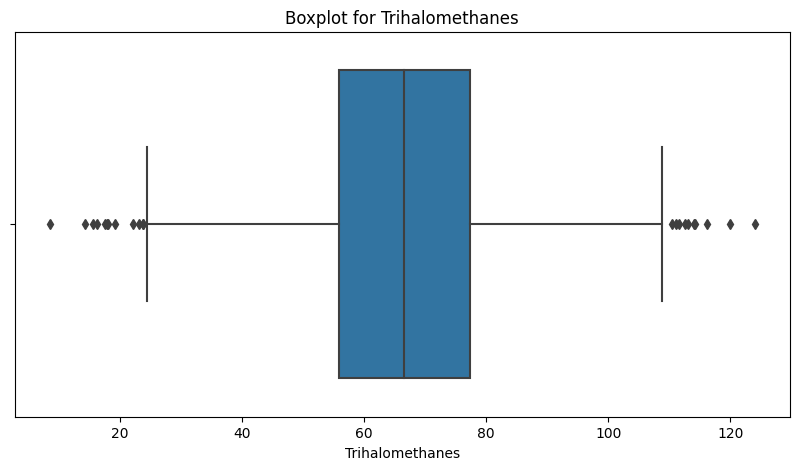

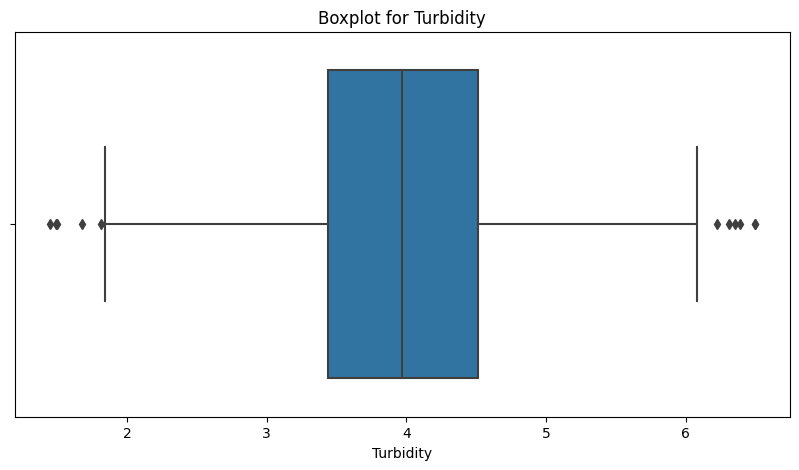

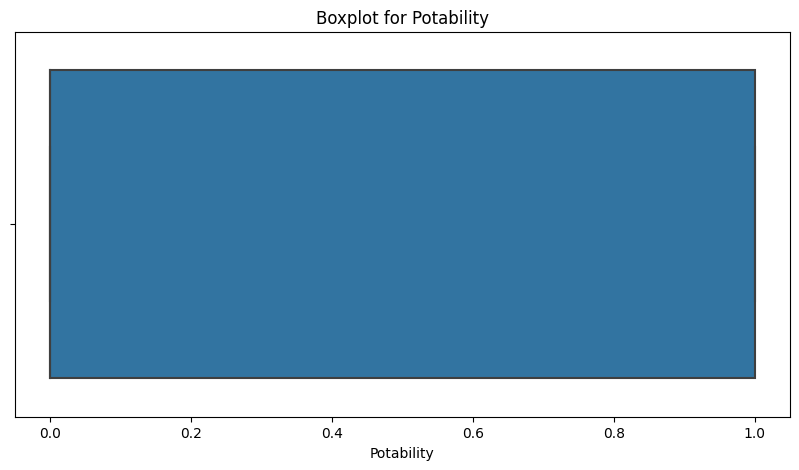

In [6]:
#Check for Outliers using Boxplots:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [10]:
#handle outliers for the columns using the IQR method
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



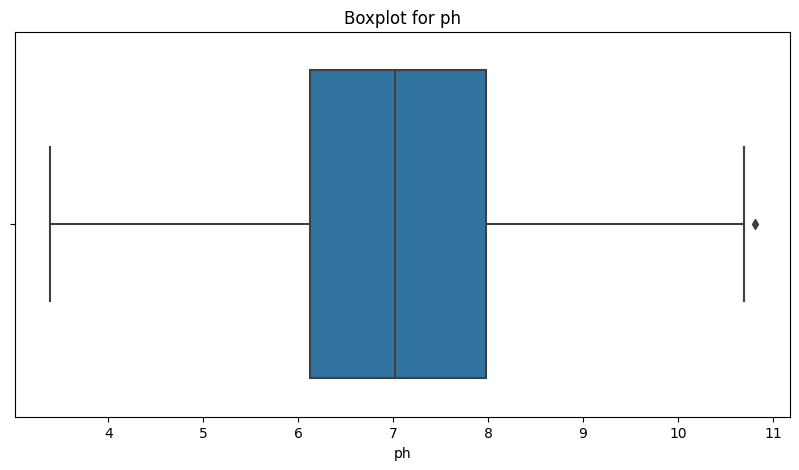

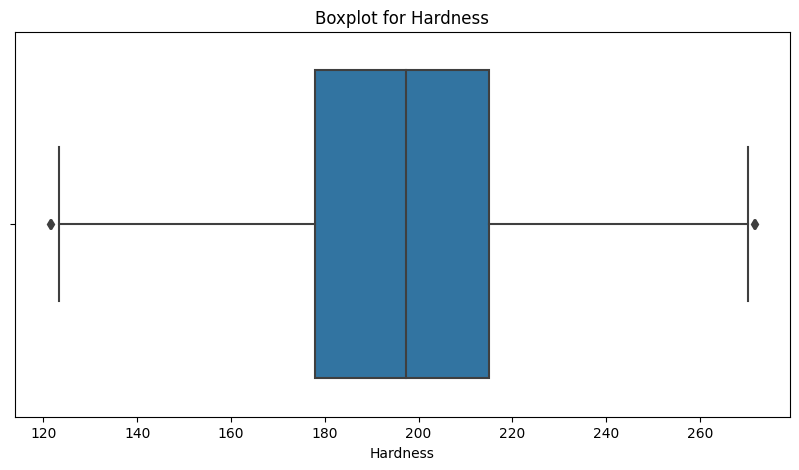

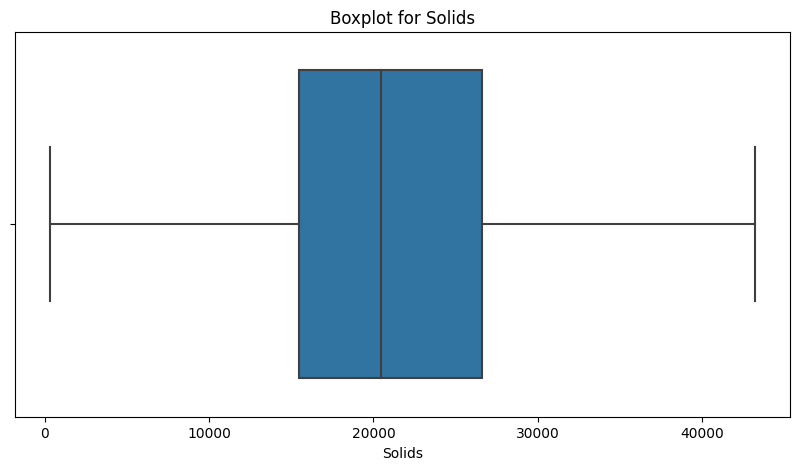

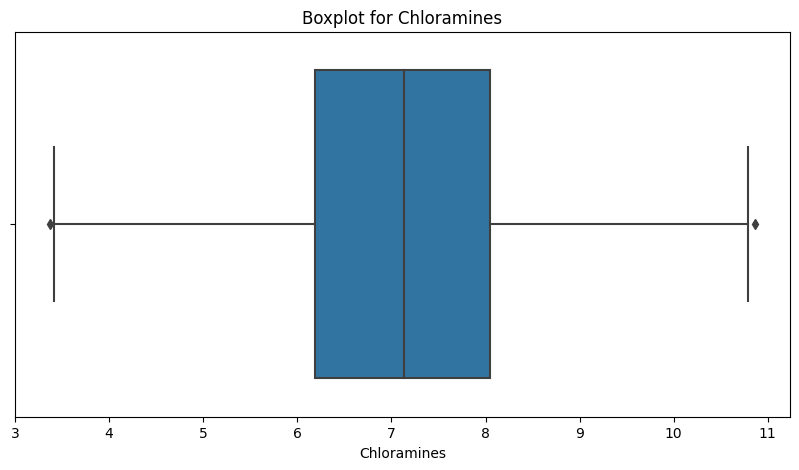

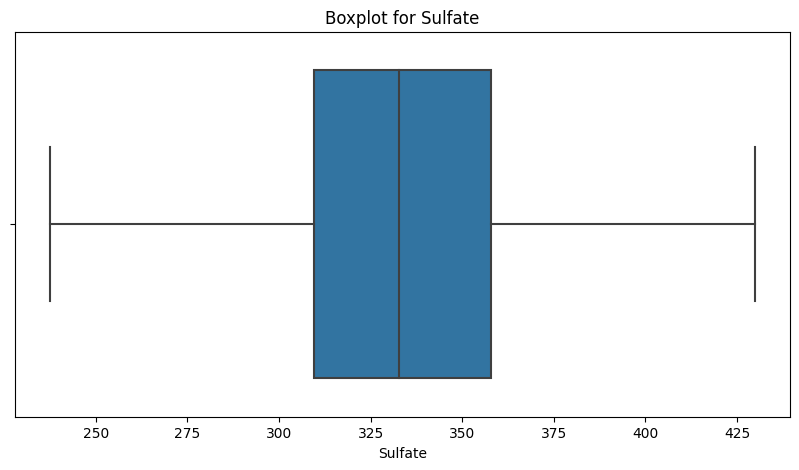

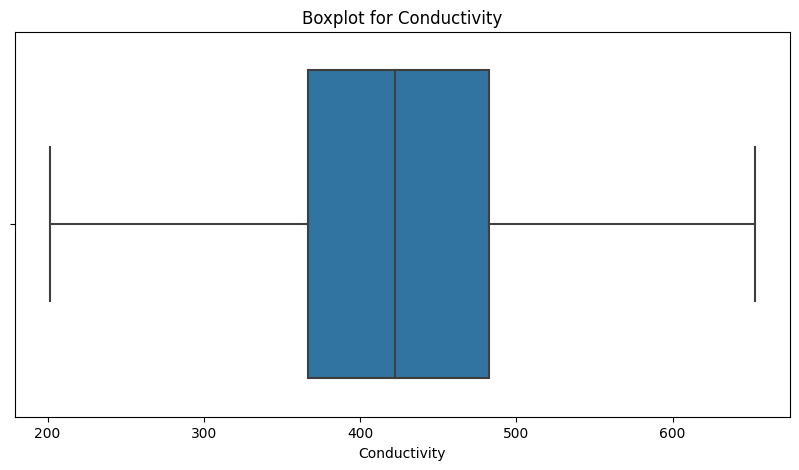

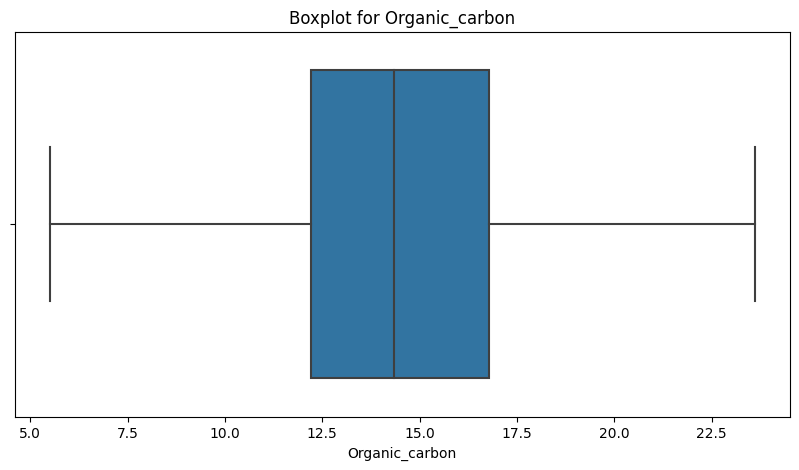

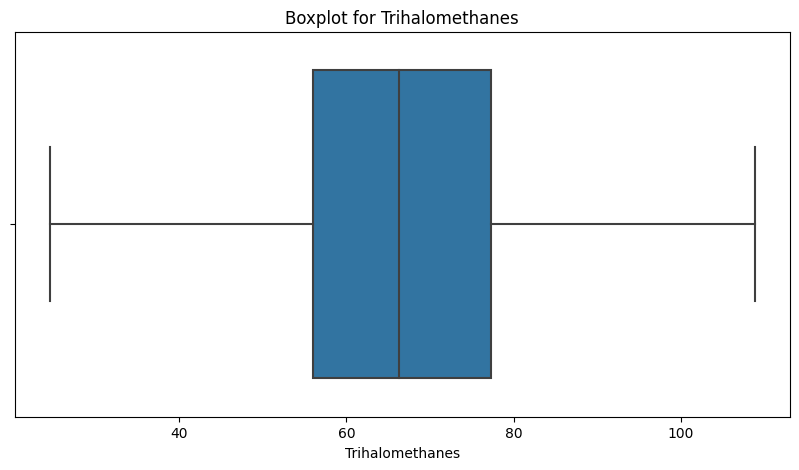

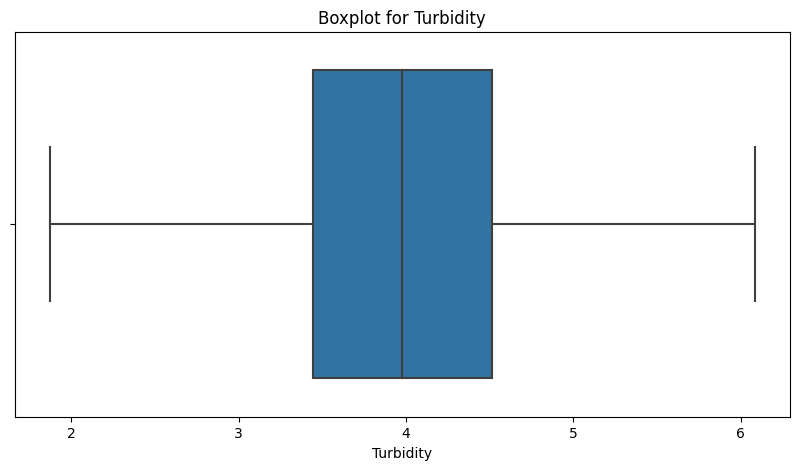

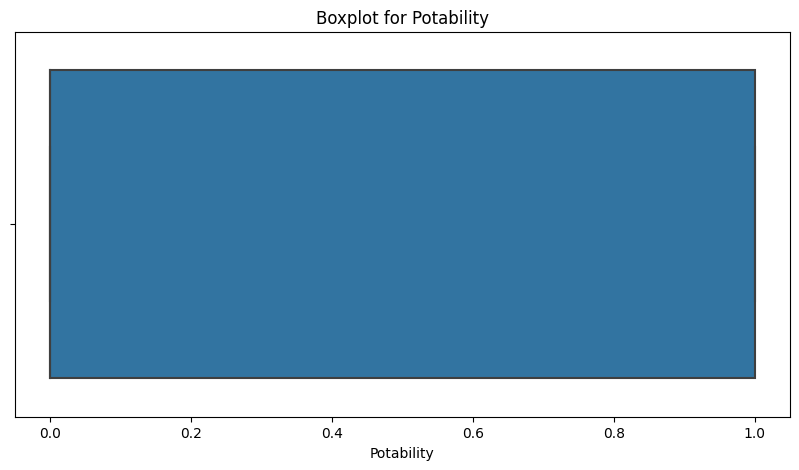

In [12]:
#Check for Outliers using Boxplots again:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

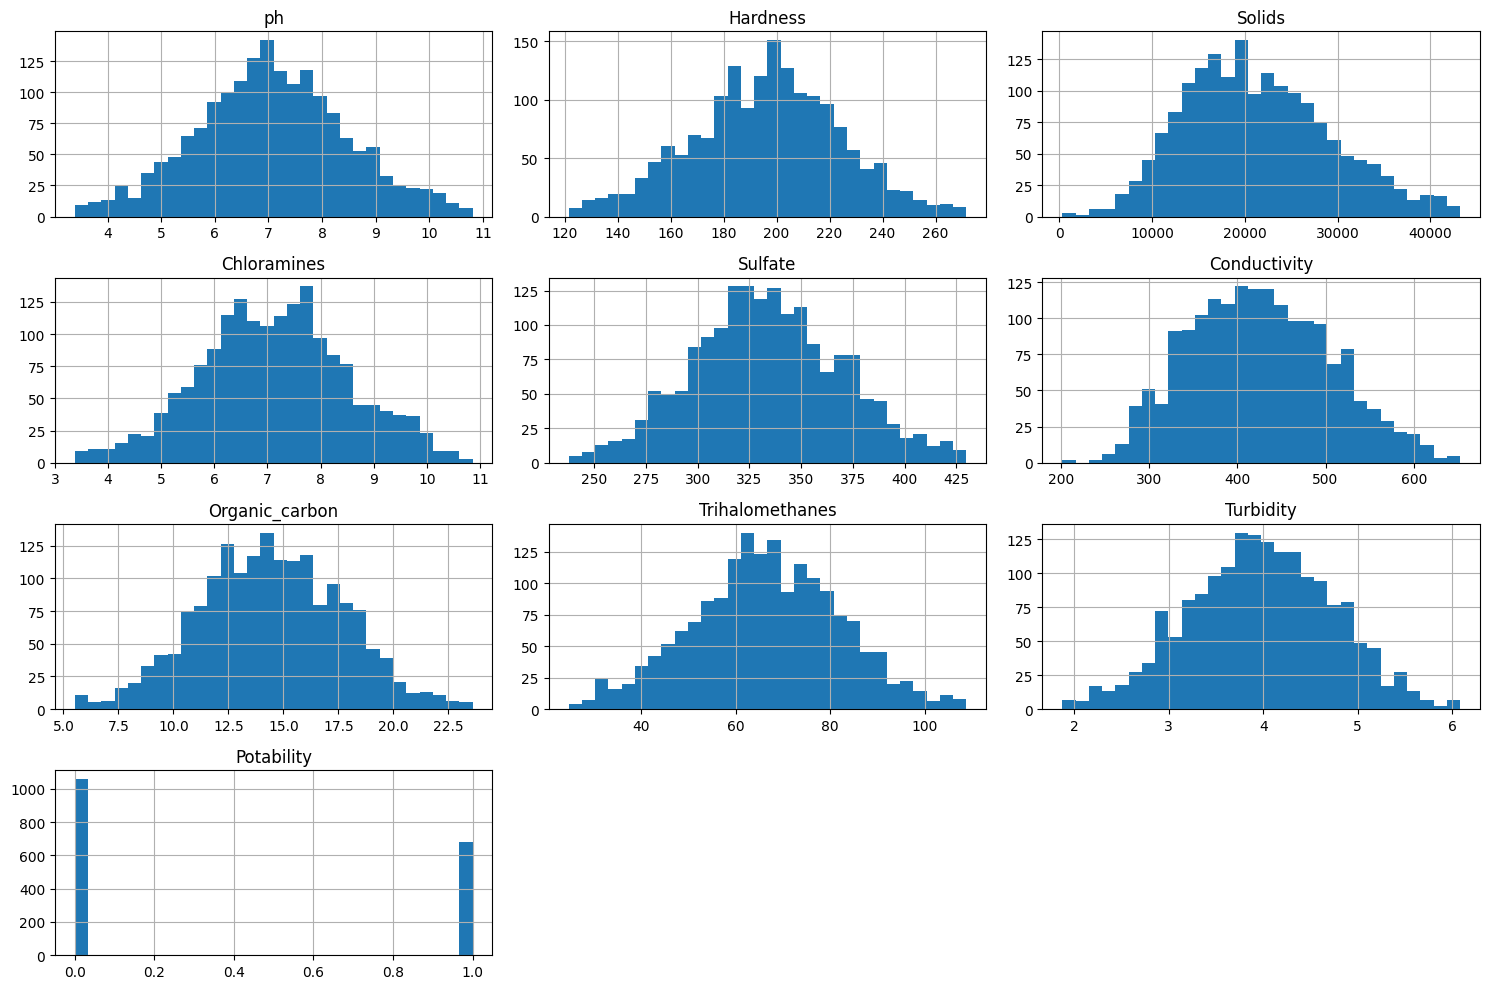

In [13]:
# Then try to do some data visiualization

#Histograms
df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()  # Ensures better spacing between plots
plt.show()


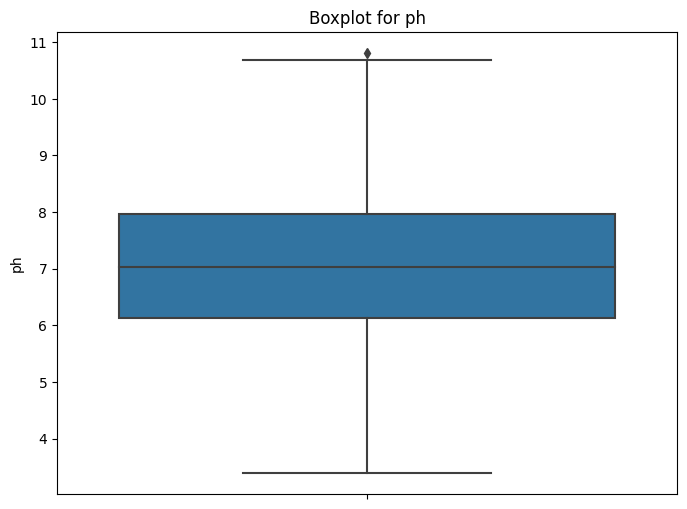

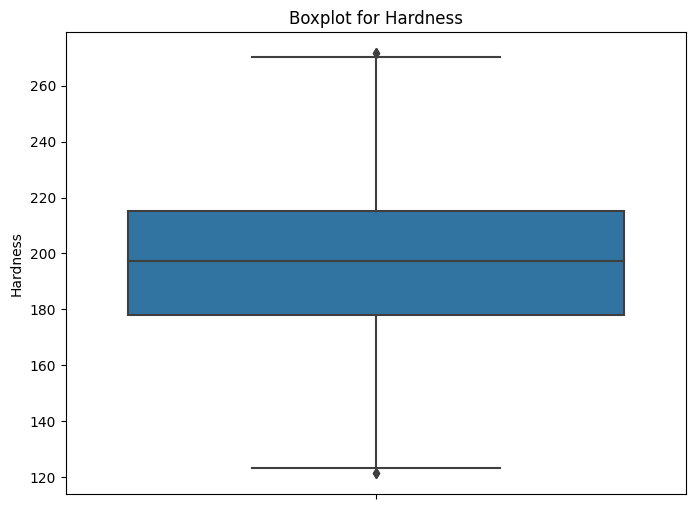

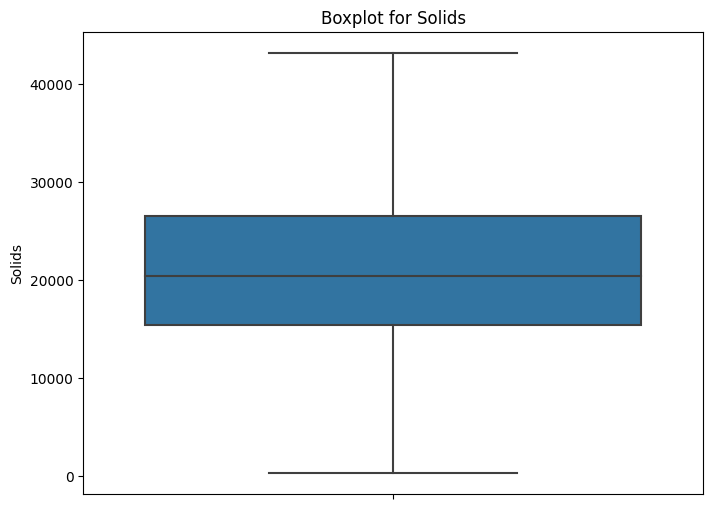

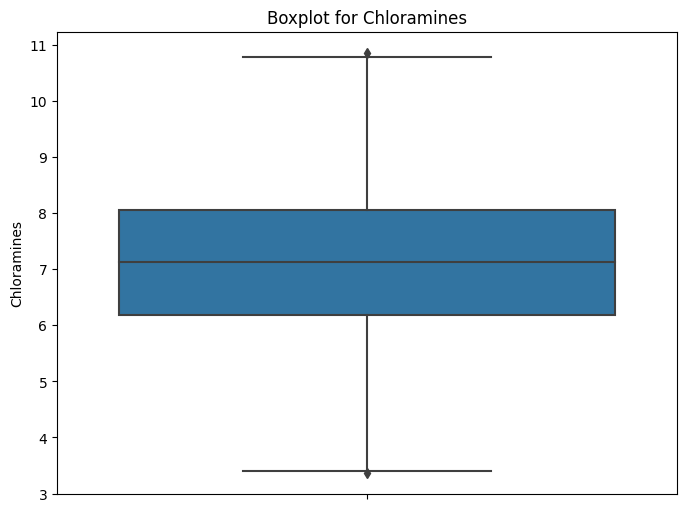

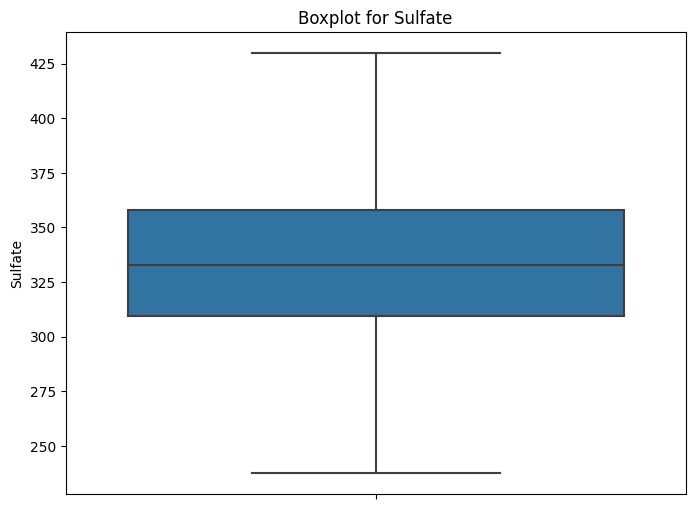

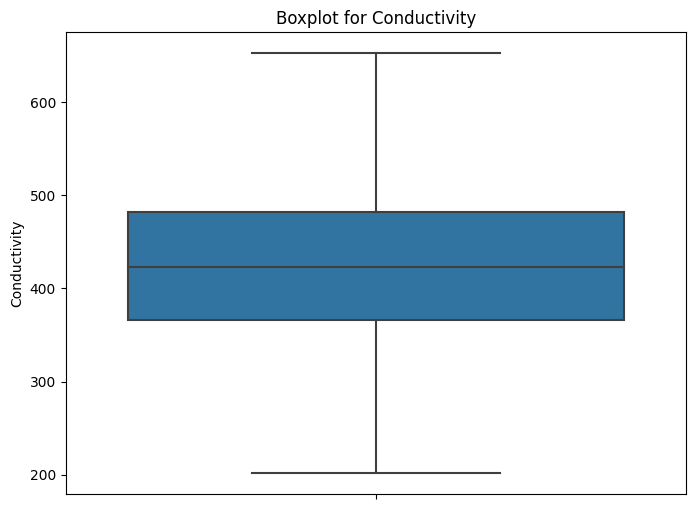

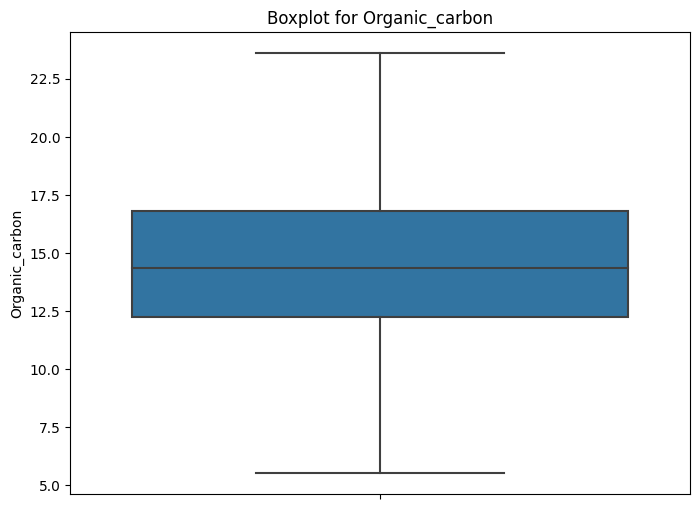

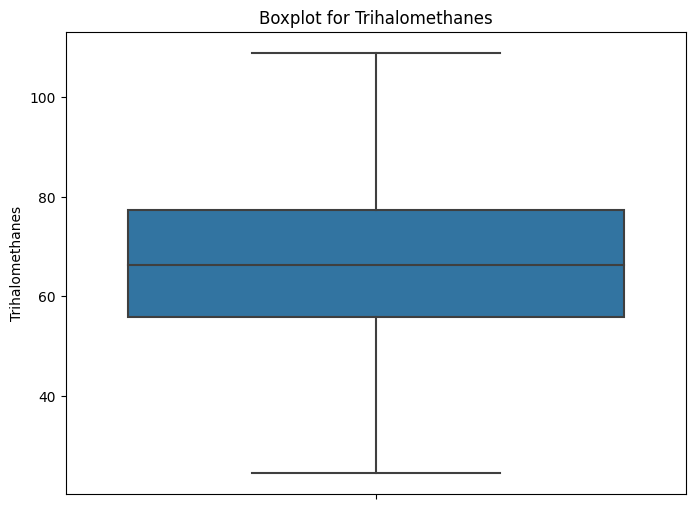

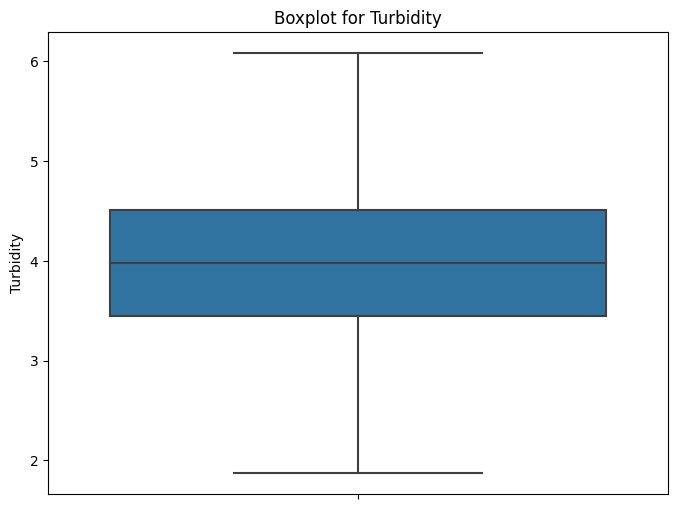

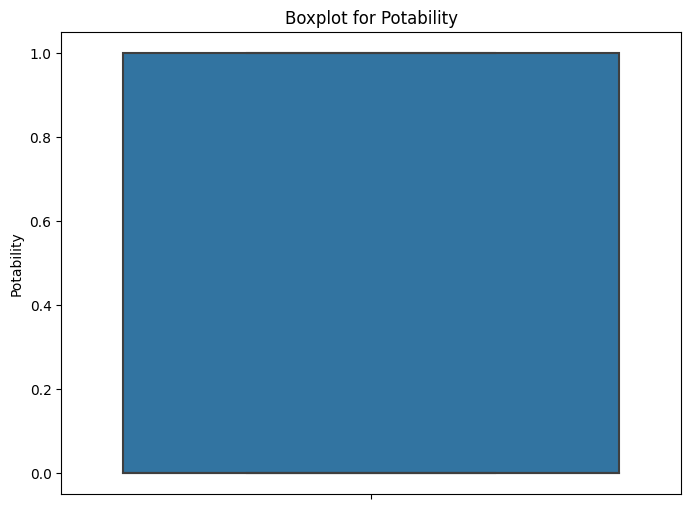

In [14]:
#Boxplots
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

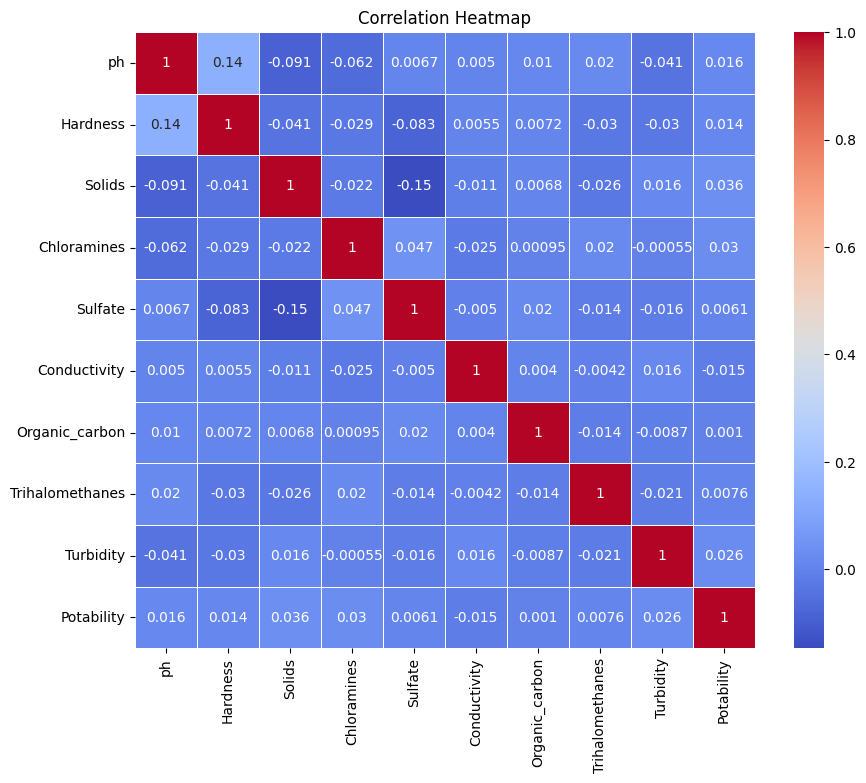

In [15]:
#Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


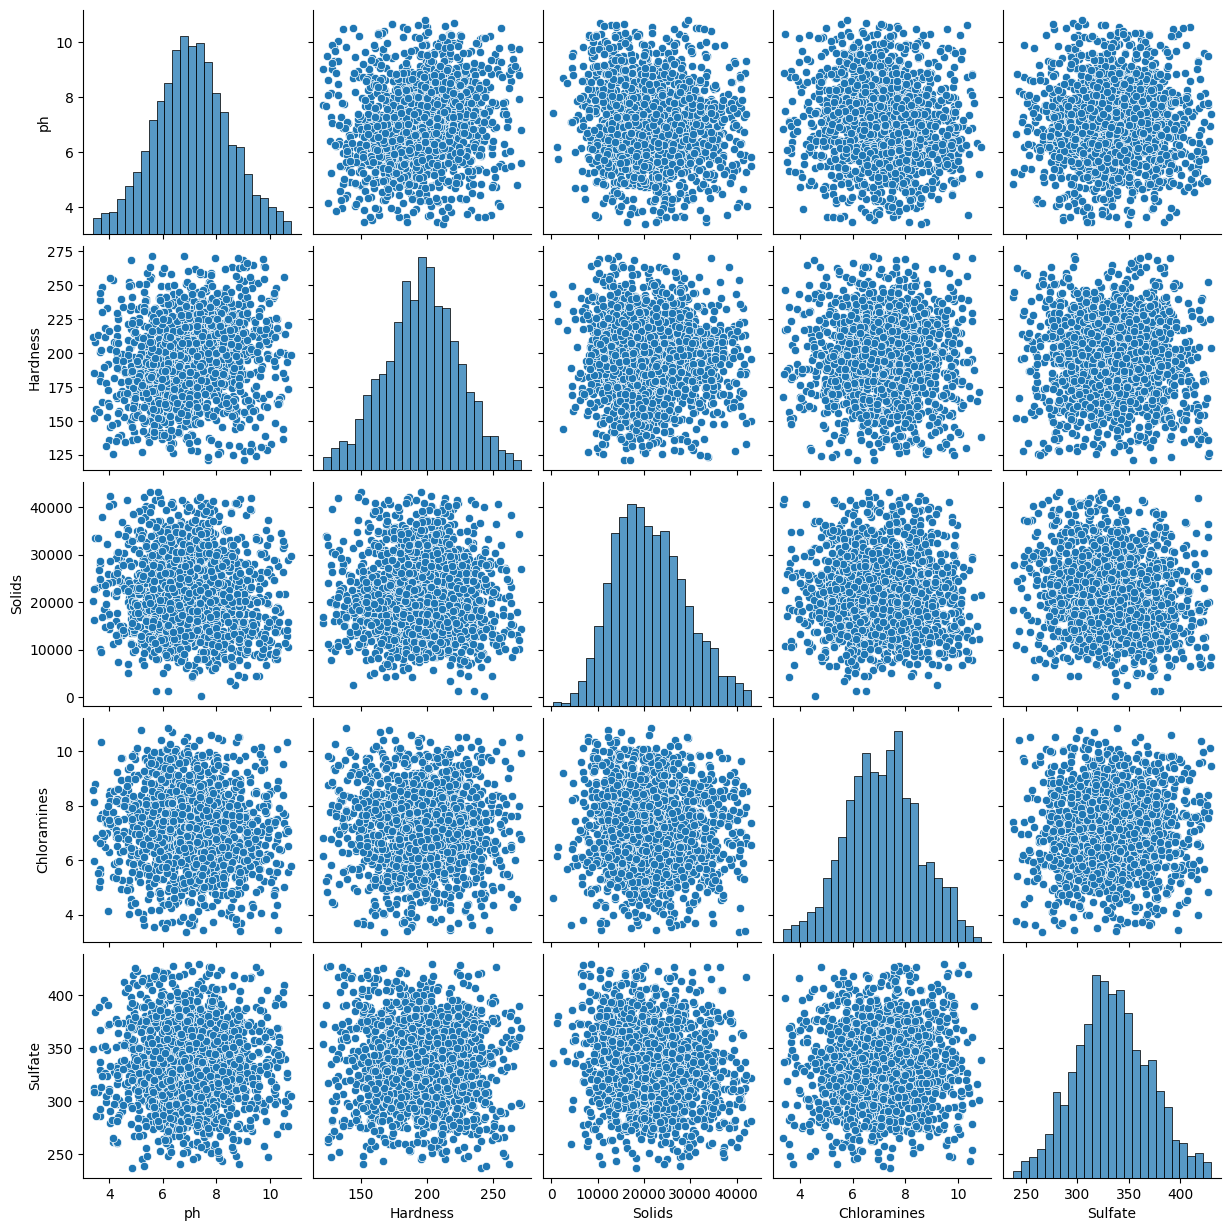

In [16]:
#Pairplots
sns.pairplot(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']])
plt.show()